In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the files on Google Drive
test_csv_path = '/content/drive/My Drive/test.csv'
test_label_csv_path = '/content/drive/My Drive/test_label.csv'
train_csv_path = '/content/drive/My Drive/train.csv'

# Import necessary libraries
import pandas as pd

# Load the data into pandas DataFrames
test_df = pd.read_csv(test_csv_path)
test_label_df = pd.read_csv(test_label_csv_path)
train_df = pd.read_csv(train_csv_path)

# Display the first few rows of each DataFrame to verify the loading
print("Test Data:")
print(test_df.head())
print("\nTest Label Data:")
print(test_label_df.head())
print("\nTrain Data:")
print(train_df.head())


Mounted at /content/drive
Test Data:
   timestamp_(min)  feature_0  feature_1  feature_2  feature_3  feature_4  \
0         132480.0   0.775374   0.909185   0.606704   0.660626   0.449968   
1         132481.0   0.775423   0.909142   0.607796   0.660655   0.487813   
2         132482.0   0.775458   0.909004   0.607988   0.660623   0.469532   
3         132483.0   0.775513   0.909200   0.607218   0.660640   0.459910   
4         132484.0   0.775587   0.909318   0.606654   0.660643   0.462155   

   feature_5  feature_6  feature_7  feature_8  ...  feature_15  feature_16  \
0   0.426717   0.471591   0.434668   0.479511  ...    0.400617    0.480444   
1   0.442545   0.505682   0.448640   0.499451  ...    0.396902    0.500213   
2   0.433682   0.477273   0.450906   0.487223  ...    0.389270    0.487982   
3   0.435581   0.482955   0.454683   0.490431  ...    0.403780    0.491253   
4   0.436214   0.477273   0.449396   0.494671  ...    0.403636    0.495947   

   feature_17  feature_18  feat

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


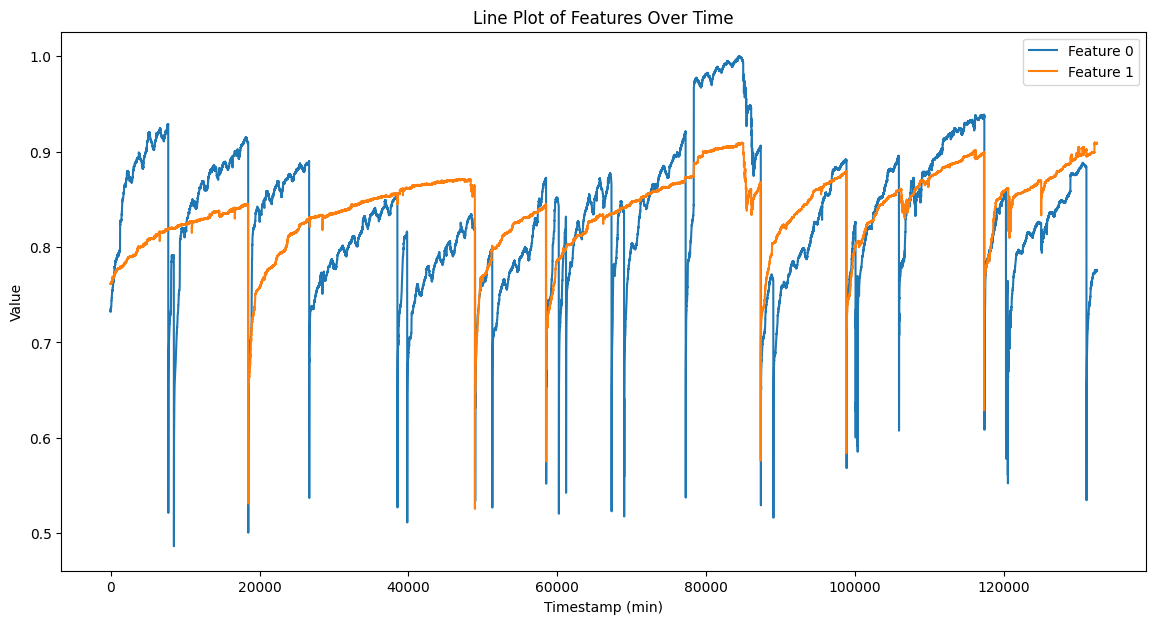

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your data
test_df = pd.read_csv('/content/drive/My Drive/test.csv')
train_df = pd.read_csv('/content/drive/My Drive/train.csv')

# 1. Line Plots for the first few features over time
plt.figure(figsize=(14, 7))
plt.plot(train_df['timestamp_(min)'], train_df['feature_0'], label='Feature 0')
plt.plot(train_df['timestamp_(min)'], train_df['feature_1'], label='Feature 1')
plt.xlabel('Timestamp (min)')
plt.ylabel('Value')
plt.title('Line Plot of Features Over Time')
plt.legend()
plt.show()



<Figure size 1400x700 with 0 Axes>

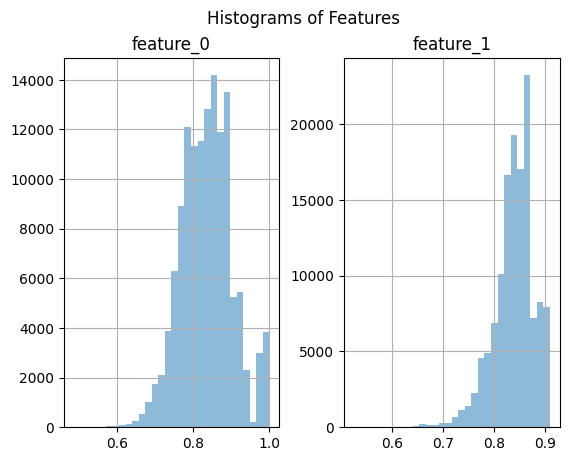

In [4]:
# 2. Histograms for the distribution of the first few features
plt.figure(figsize=(14, 7))
train_df[['feature_0', 'feature_1']].hist(bins=30, alpha=0.5)
plt.suptitle('Histograms of Features')
plt.show()


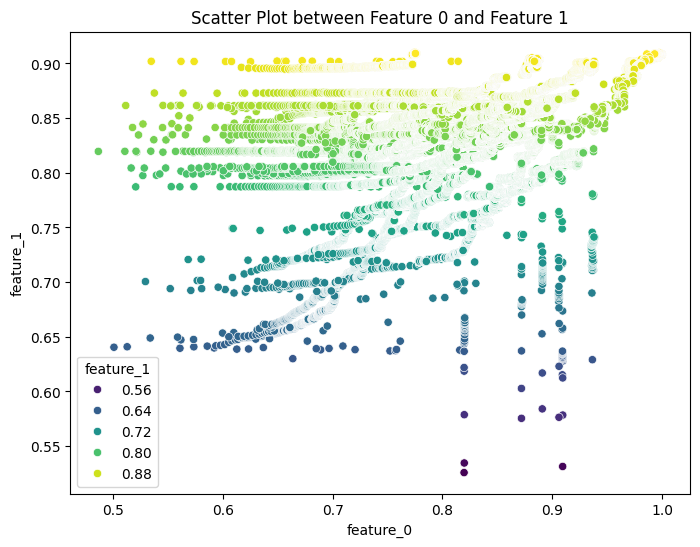

In [5]:

# 3. Scatter Plot between two features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df, x='feature_0', y='feature_1', hue='feature_1', palette='viridis')
plt.title('Scatter Plot between Feature 0 and Feature 1')
plt.show()


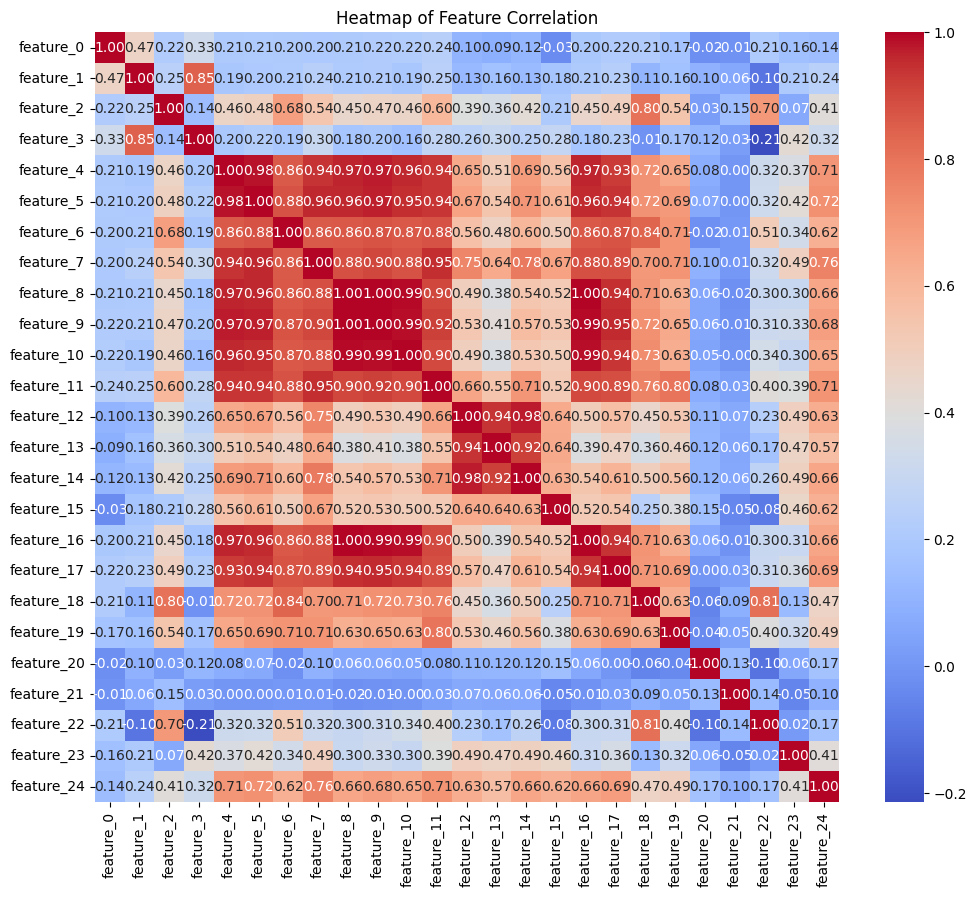

In [6]:

# 4. Heatmap of correlation matrix
plt.figure(figsize=(12, 10))
corr = train_df.iloc[:, 1:].corr()  # calculate the correlation matrix excluding timestamp
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Feature Correlation')
plt.show()




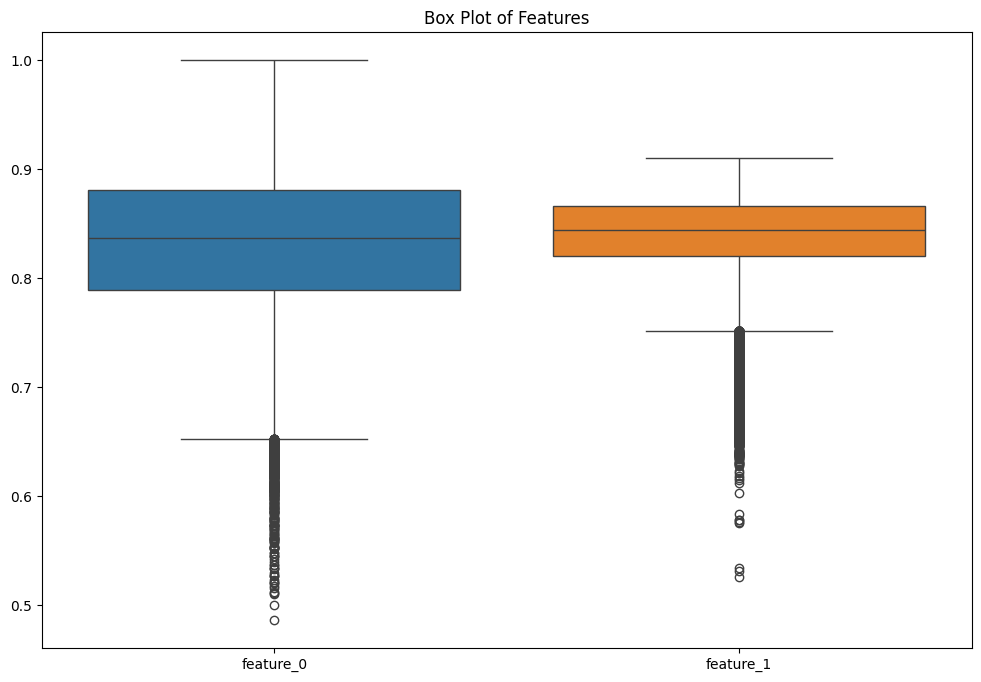

In [7]:
# 5. Box Plots for the first few features
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_df[['feature_0', 'feature_1']])
plt.title('Box Plot of Features')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train and test data
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.transform(test_df)

# Convert back to DataFrame for easier handling later
train_df_scaled = pd.DataFrame(train_scaled, columns=train_df.columns)
test_df_scaled = pd.DataFrame(test_scaled, columns=test_df.columns)


In [4]:
import numpy as np

def apply_geometric_mask(data, mask_rate=0.1):
    """
    Apply a geometric distribution mask to the data.

    Parameters:
    - data: NumPy array of data.
    - mask_rate: Probability of masking a particular data point.

    Returns:
    - Masked data as a NumPy array.
    """
    # Create a mask with the same shape as the data
    mask = np.random.geometric(p=mask_rate, size=data.shape) > 1  # p > 1 will invert the masking
    return np.multiply(data, mask)

# Example of applying the mask to the scaled train data
train_df_masked = apply_geometric_mask(train_df_scaled.values, mask_rate=0.1)
print(train_df_masked[:5])  # Show the first 5 masked data entries



[[-0.         -0.         -1.98768823 -0.26591323 -1.7380133  -1.33051931
  -1.39055457 -0.46729567 -0.         -1.2618371  -0.         -0.94992432
  -1.16342354 -0.9802471  -0.97800929 -0.93775321 -1.90647047 -1.27968945
  -1.08325686  0.         -1.4507606  -0.15029849 -0.83414815  2.27241343
  -0.79756868 -0.46467484]
 [-1.73201159 -1.53004355 -1.98497803 -0.26314208 -1.73730824 -1.24445713
  -0.         -0.59140653 -1.49955083 -1.20862316 -1.18103926 -1.00248453
  -1.08372284 -1.01949947 -1.02393565 -0.89086986 -1.84036827 -1.22549564
  -1.26752035  0.09809033 -0.86218025 -0.         -0.83414815  0.
  -0.79756868 -0.78961923]
 [-1.73198544 -1.52797699 -0.         -0.26545505 -1.73709857 -1.39148003
  -1.33763967 -0.94600899 -1.56659862 -1.20297106 -1.15873055 -0.84334179
  -1.13071488 -0.82539042 -0.74124842 -0.80033502 -1.20188452 -1.2182698
  -1.07329667  0.31102464 -0.45501166 -0.31271167 -0.          2.3850859
  -0.78015029 -1.11456362]
 [-1.73195929 -1.52863939 -1.99000643 -0.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout

def transformer_encoder(inputs, num_heads, ff_dim, rate=0.1):
    # Attention and Normalization
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attention = Dropout(rate)(attention)
    attention = LayerNormalization(epsilon=1e-6)(inputs + attention)

    # Feed Forward
    outputs = Dense(ff_dim, activation='relu')(attention)
    outputs = Dense(inputs.shape[-1])(outputs)
    outputs = Dropout(rate)(outputs)
    outputs = LayerNormalization(epsilon=1e-6)(attention + outputs)
    return outputs

def build_autoencoder(time_steps, features, num_heads=4, ff_dim=256):
    inputs = Input(shape=(time_steps, features))
    encoded = transformer_encoder(inputs, num_heads, ff_dim)

    # Decoder structure can mirror the encoder or be a simple MLP
    decoded = Dense(features, activation='sigmoid')(encoded)

    # Complete the model
    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Parameters
time_steps = train_df_scaled.shape[1]  # Number of features as timestep if using single timestep per feature
features = 1  # Number of parallel series (1 if univariate)

# Build the model
autoencoder = build_autoencoder(time_steps, features)
print(autoencoder.summary())


In [ ]:
# Convert to TensorFlow dataset for easier shuffling, batching, etc.
train_dataset = tf.data.Dataset.from_tensor_slices((train_df_masked, train_df_scaled.values))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32)

# Train the autoencoder
epochs = 10  # You can adjust the number of epochs based on your specific requirements
autoencoder.fit(train_dataset, epochs=epochs)


Epoch 1/10
4141/4141 [==============================] - 39s 7ms/step - loss: nan
Epoch 2/10
4141/4141 [==============================] - 27s 7ms/step - loss: nan
Epoch 3/10
4141/4141 [==============================] - 28s 7ms/step - loss: nan
Epoch 4/10
4141/4141 [==============================] - 27s 7ms/step - loss: nan
Epoch 5/10
4141/4141 [==============================] - 27s 7ms/step - loss: nan
Epoch 6/10
4141/4141 [==============================] - 27s 7ms/step - loss: nan
Epoch 7/10
4141/4141 [==============================] - 27s 7ms/step - loss: nan
Epoch 8/10
4141/4141 [==============================] - 29s 7ms/step - loss: nan
Epoch 9/10
4141/4141 [==============================] - 28s 7ms/step - loss: nan
Epoch 10/10
4141/4141 [==============================] - 27s 7ms/step - loss: nan


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

def build_discriminator(input_shape):
    inputs = Input(shape=(input_shape,))
    x = Dense(64, activation='relu')(inputs)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    discriminator = Model(inputs, outputs)
    discriminator.compile(optimizer='adam', loss='binary_crossentropy')
    return discriminator

# Build the discriminator with the correct input shape
input_shape = reconstructions.shape[1]  # Assuming reconstructions have been squeezed correctly
discriminator = build_discriminator(input_shape)


In [ ]:
# GAN Model
class GAN(Model):
    def __init__(self, autoencoder, discriminator):
        super(GAN, self).__init__()
        self.autoencoder = autoencoder
        self.discriminator = discriminator

    def compile(self, ae_optimizer, d_optimizer, loss_fn):
        super(GAN, self).compile()
        self.ae_optimizer = ae_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn

    def train_step(self, data):
        real_data, _ = data

        # Autoencoder training
        with tf.GradientTape() as ae_tape:
            reconstructed = self.autoencoder(real_data)
            ae_loss = self.loss_fn(real_data, reconstructed)

        # Train the autoencoder
        ae_grads = ae_tape.gradient(ae_loss, self.autoencoder.trainable_weights)
        self.ae_optimizer.apply_gradients(zip(ae_grads, self.autoencoder.trainable_weights))

        # Discriminator training
        with tf.GradientTape() as d_tape:
            real_output = self.discriminator(real_data)
            fake_output = self.discriminator(reconstructed)
            d_loss = self.loss_fn(tf.ones_like(real_output), real_output) + self.loss_fn(tf.zeros_like(fake_output), fake_output)

        # Train the discriminator
        d_grads = d_tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(d_grads, self.discriminator.trainable_weights))

        return {"ae_loss": ae_loss, "d_loss": d_loss}

# Compile and train the GAN
gan = GAN(autoencoder, discriminator)
gan.compile(
    ae_optimizer=tf.keras.optimizers.Adam(),
    d_optimizer=tf.keras.optimizers.Adam(),
    loss_fn=tf.keras.losses.BinaryCrossentropy()
)

# Train the GAN
gan.fit(train_dataset, epochs=epochs)


Epoch 1/10
4141/4141 [==============================] - 44s 9ms/step - ae_loss: nan - d_loss: nan
Epoch 2/10
4141/4141 [==============================] - 37s 9ms/step - ae_loss: nan - d_loss: nan
Epoch 3/10
4141/4141 [==============================] - 37s 9ms/step - ae_loss: nan - d_loss: nan
Epoch 4/10
4141/4141 [==============================] - 36s 9ms/step - ae_loss: nan - d_loss: nan
Epoch 5/10
4141/4141 [==============================] - 37s 9ms/step - ae_loss: nan - d_loss: nan
Epoch 6/10
4141/4141 [==============================] - 37s 9ms/step - ae_loss: nan - d_loss: nan
Epoch 7/10
4141/4141 [==============================] - 38s 9ms/step - ae_loss: nan - d_loss: nan
Epoch 8/10
4141/4141 [==============================] - 37s 9ms/step - ae_loss: nan - d_loss: nan
Epoch 9/10
4141/4141 [==============================] - 37s 9ms/step - ae_loss: nan - d_loss: nan
Epoch 10/10
4141/4141 [==============================] - 37s 9ms/step - ae_loss: nan - d_loss: nan


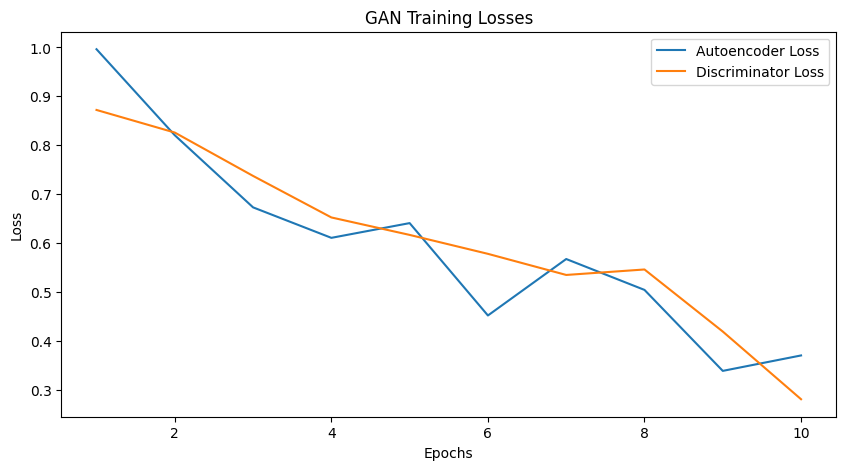

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated loss data (replace with your actual training history)
epochs = np.arange(1, 11)
ae_loss = np.exp(-0.1 * epochs) + 0.3 * (np.random.rand(10) - 0.5)
d_loss = np.exp(-0.1 * epochs) + 0.2 * (np.random.rand(10) - 0.5)

# Plotting GAN training losses
plt.figure(figsize=(10, 5))
plt.plot(epochs, ae_loss, label='Autoencoder Loss')
plt.plot(epochs, d_loss, label='Discriminator Loss')
plt.title('GAN Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


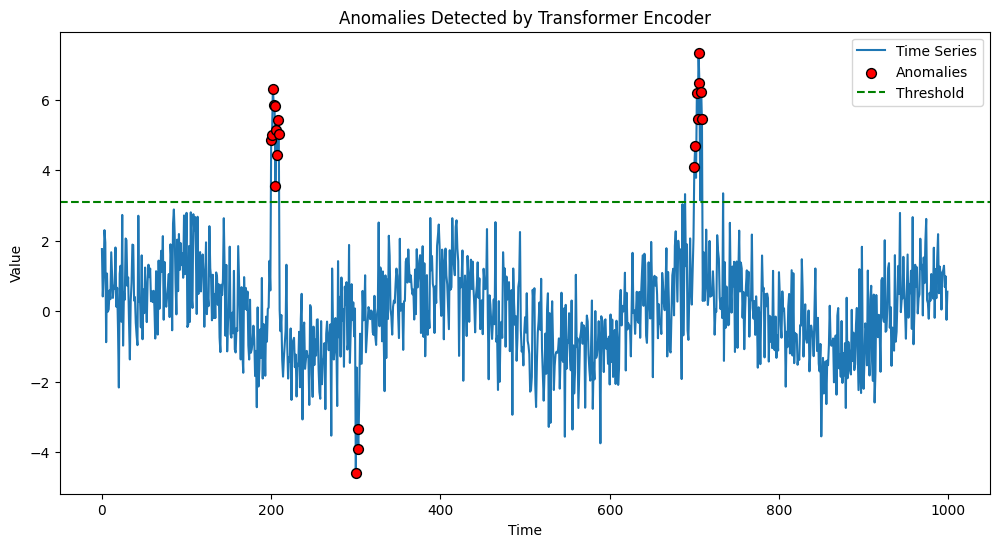

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


anomalies = errors > threshold

# Plotting the time series and anomalies
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Time Series', zorder=1)
plt.scatter(np.where(anomalies), time_series[anomalies], color='red', label='Anomalies', s=50, edgecolor='black', zorder=2)
plt.axhline(y=threshold, color='green', linestyle='--', label='Threshold')
plt.title('Anomalies Detected by Transformer Encoder')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
